In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Analyze & Understand Data
------------------------------------------------------------------------------------------------------------------------------------------------------------

In [5]:
# Load training and test data
train_df = pd.read_csv('data/train_set.csv')
test_df = pd.read_csv('data/test_set.csv')

train_df.head()

,Unnamed: 0,g0495+ctrl,g0261+g0760,g0232+ctrl,g0083+g0599,g0461+ctrl,g0160+g0495,g0276+ctrl,g0147+g0241,g0200+g0605,...,g0261+g0013.39,g0186+g0868.39,g0228+g0780.39,g0186+g0216.39,g0520+ctrl.39,g0927+g0852.39,g0671+ctrl.39,g0301+g0139.39,g0843+ctrl.39,g0061+ctrl.39
0,g0001,0.016378,1.066582,0.000000,0.000000,0.434476,0.001927,0.000000,0.000000,1.355243,...,0.010157,0.621668,0.000000,0.000830,0.012849,0.596048,0.007868,0.000000,0.503691,0.494527
1,g0002,0.005795,1.055038,0.467867,0.002771,0.005256,0.000000,0.482638,0.001186,0.000000,...,0.454502,1.013297,0.018614,0.005107,0.000000,0.008325,0.729548,0.000081,0.010975,0.499198
2,g0003,1.077192,0.000000,1.615947,1.095600,2.291888,0.622666,1.959727,0.005043,1.695185,...,2.173926,1.957292,0.891706,0.004772,1.486960,1.427854,0.737765,1.168904,1.721672,1.830649
3,g0004,1.087270,0.003542,0.017293,0.000000,0.440990,0.001127,0.010667,0.004690,0.901058,...,0.469801,0.624264,0.005365,0.000000,0.000000,0.621874,1.151926,0.525821,0.829042,0.000000
4,g0005,0.668079,0.000175,1.365268,0.003322,0.975067,0.977491,0.497815,0.004708,0.911088,...,1.643346,0.612687,1.676331,0.000000,1.470796,0.950370,0.738596,1.339436,0.501294,1.093151


In [6]:
test_df.head()

,g0037+g0083
0,g0083+g0605
1,g0095+g0257
2,g0095+g0520
3,g0109+g0317
4,g0109+g0965


In [7]:
train_df = train_df.rename(columns={"Unnamed: 0": "gene_id"})
train_df.head()

,gene_id,g0495+ctrl,g0261+g0760,g0232+ctrl,g0083+g0599,g0461+ctrl,g0160+g0495,g0276+ctrl,g0147+g0241,g0200+g0605,...,g0261+g0013.39,g0186+g0868.39,g0228+g0780.39,g0186+g0216.39,g0520+ctrl.39,g0927+g0852.39,g0671+ctrl.39,g0301+g0139.39,g0843+ctrl.39,g0061+ctrl.39
0,g0001,0.016378,1.066582,0.000000,0.000000,0.434476,0.001927,0.000000,0.000000,1.355243,...,0.010157,0.621668,0.000000,0.000830,0.012849,0.596048,0.007868,0.000000,0.503691,0.494527
1,g0002,0.005795,1.055038,0.467867,0.002771,0.005256,0.000000,0.482638,0.001186,0.000000,...,0.454502,1.013297,0.018614,0.005107,0.000000,0.008325,0.729548,0.000081,0.010975,0.499198
2,g0003,1.077192,0.000000,1.615947,1.095600,2.291888,0.622666,1.959727,0.005043,1.695185,...,2.173926,1.957292,0.891706,0.004772,1.486960,1.427854,0.737765,1.168904,1.721672,1.830649
3,g0004,1.087270,0.003542,0.017293,0.000000,0.440990,0.001127,0.010667,0.004690,0.901058,...,0.469801,0.624264,0.005365,0.000000,0.000000,0.621874,1.151926,0.525821,0.829042,0.000000
4,g0005,0.668079,0.000175,1.365268,0.003322,0.975067,0.977491,0.497815,0.004708,0.911088,...,1.643346,0.612687,1.676331,0.000000,1.470796,0.950370,0.738596,1.339436,0.501294,1.093151


In [8]:
train_df.shape

(1000, 7081)

In [9]:
test_df = test_df.rename(columns={test_df.columns[0]: "perturbation"})
test_df.head()

,perturbation
0,g0083+g0605
1,g0095+g0257
2,g0095+g0520
3,g0109+g0317
4,g0109+g0965


In [10]:
# Build long table: gene | perturb_gene1 | perturb_gene2 | expression

value_cols = [c for c in train_df.columns if c != 'gene_id']
long_df = train_df.melt(id_vars='gene_id', value_vars=value_cols, var_name='perturbation', value_name='expression')

# Split perturbation into two genes (singles will have second = NaN)
pert_split = long_df['perturbation'].str.split('+', n=1, expand=True)
long_df['perturb_gene1'] = pert_split[0]
long_df['perturb_gene2'] = pert_split[1]  # will be NaN for single perturbations

# Reorder and rename gene_id to gene
train2_df = long_df[['gene_id','perturb_gene1','perturb_gene2','expression']].rename(columns={'gene_id':'gene'})


train2_df.head()

,gene,perturb_gene1,perturb_gene2,expression
0,g0001,g0495,ctrl,0.016378
1,g0002,g0495,ctrl,0.005795
2,g0003,g0495,ctrl,1.077192
3,g0004,g0495,ctrl,1.087270
4,g0005,g0495,ctrl,0.668079


In [11]:
train2_df.tail()

,gene,perturb_gene1,perturb_gene2,expression
7079995,g0996,g0061,ctrl.39,0.007941
7079996,g0997,g0061,ctrl.39,0.014103
7079997,g0998,g0061,ctrl.39,0.485431
7079998,g0999,g0061,ctrl.39,1.089852
7079999,g1000,g0061,ctrl.39,1.083454


In [12]:
# Analyze perturbation types

# Get all perturbation names (columns except gene_id)
perturbations = train_df.columns[1:]

# Separate single vs double perturbations
single_perts = [p for p in perturbations if "+" not in p and p != "ctrl"]
double_perts = [p for p in perturbations if "+" in p]

print("Total perturbations:", len(perturbations))
print("Singles:", len(single_perts))
print("Doubles:", len(double_perts))
print("Example singles:", single_perts[:10])
print("Example doubles:", double_perts[:10])


Total perturbations: 7080
Singles: 39
Doubles: 7040
Example singles: ['ctrl.1', 'ctrl.2', 'ctrl.3', 'ctrl.4', 'ctrl.5', 'ctrl.6', 'ctrl.7', 'ctrl.8', 'ctrl.9', 'ctrl.10']
Example doubles: ['g0495+ctrl', 'g0261+g0760', 'g0232+ctrl', 'g0083+g0599', 'g0461+ctrl', 'g0160+g0495', 'g0276+ctrl', 'g0147+g0241', 'g0200+g0605', 'g0761+g0157']


In [13]:
count_0495 = [p for p in perturbations if 'g0495' in p]
print("Count of g0495 perturbations:", len(count_0495))
print("Example g0495 perturbations:", count_0495[:20])

Count of g0495 perturbations: 160
Example g0495 perturbations: ['g0495+ctrl', 'g0160+g0495', 'g0013+g0495', 'g0160+g0495.1', 'g0927+g0495', 'g0013+g0495.1', 'g0927+g0495.1', 'g0495+ctrl.1', 'g0160+g0495.2', 'g0495+ctrl.2', 'g0013+g0495.2', 'g0495+ctrl.3', 'g0013+g0495.3', 'g0160+g0495.3', 'g0160+g0495.4', 'g0160+g0495.5', 'g0013+g0495.4', 'g0013+g0495.5', 'g0013+g0495.6', 'g0160+g0495.6']


In [14]:
count_dot = [p for p in perturbations if '.' in p and 'ctrl' not in p]
print("Count of perturbations with dots", len(count_dot))
print("Example perturbations with dots:", count_dot[:20])

Count of perturbations with dots 2925
Example perturbations with dots: ['g0160+g0495.1', 'g0534+g0612.1', 'g0927+g0805.1', 'g0200+g0605.1', 'g0787+g0655.1', 'g0698+g0207.1', 'g0301+g0139.1', 'g0301+g0751.1', 'g0698+g0207.2', 'g0186+g0868.1', 'g0965+g0655.1', 'g0534+g0612.2', 'g0147+g0241.1', 'g0698+g0207.3', 'g0083+g0633.1', 'g0698+g0207.4', 'g0927+g0805.2', 'g0761+g0157.1', 'g0844+g0957.1', 'g0761+g0157.2']


In [15]:
count_test = [p for p in perturbations if 'g0083+g0599' in p]
print(len(count_test))

40


# Create Features Table
------------------------------------------------------------------------------------------------------------------------------------------------------------

In [16]:
train = pd.read_csv("data/train_set.csv", index_col=0)  # rows = genes, cols = perturbations

# Identify control-only columns (like ctrl1, ctrl2, ...)
pure_ctrl_cols = [c for c in train.columns if c.lower().startswith("ctrl")]

In [49]:
# check num of pure ctrl, should be 40
print("Number of pure control columns:", len(pure_ctrl_cols))
print("Pure ctrl cols:", pure_ctrl_cols)

Number of pure control columns: 40
Pure ctrl cols: ['ctrl', 'ctrl.1', 'ctrl.2', 'ctrl.3', 'ctrl.4', 'ctrl.5', 'ctrl.6', 'ctrl.7', 'ctrl.8', 'ctrl.9', 'ctrl.10', 'ctrl.11', 'ctrl.12', 'ctrl.13', 'ctrl.14', 'ctrl.15', 'ctrl.16', 'ctrl.17', 'ctrl.18', 'ctrl.19', 'ctrl.20', 'ctrl.21', 'ctrl.22', 'ctrl.23', 'ctrl.24', 'ctrl.25', 'ctrl.26', 'ctrl.27', 'ctrl.28', 'ctrl.29', 'ctrl.30', 'ctrl.31', 'ctrl.32', 'ctrl.33', 'ctrl.34', 'ctrl.35', 'ctrl.36', 'ctrl.37', 'ctrl.38', 'ctrl.39']


In [50]:
train[pure_ctrl_cols].head()

,ctrl,ctrl.1,ctrl.2,ctrl.3,ctrl.4,ctrl.5,ctrl.6,ctrl.7,ctrl.8,ctrl.9,...,ctrl.30,ctrl.31,ctrl.32,ctrl.33,ctrl.34,ctrl.35,ctrl.36,ctrl.37,ctrl.38,ctrl.39
g0001,0.836312,0.028914,0.000000,1.143639,0.017690,0.753267,0.621105,0.995904,0.444173,0.000000,...,0.000000,0.021107,0.000000,0.005619,0.540809,0.516010,0.000000,0.477841,0.008036,0.000480
g0002,0.511849,0.000000,0.021841,0.005361,0.000000,0.000000,1.039343,0.011422,0.008642,0.001953,...,0.009748,0.709725,0.000000,0.000000,0.545621,0.000000,0.557010,0.000000,0.000000,0.005811
g0003,1.445944,2.079188,1.822911,0.012007,1.845350,1.717792,1.531284,2.137802,1.338088,2.104632,...,1.252130,1.258434,1.486947,1.863053,1.690039,1.522627,1.795411,1.429553,1.666555,1.782848
g0004,0.008603,0.000000,0.007871,0.000000,0.663040,0.761658,1.309351,0.968819,0.456875,0.476410,...,0.474979,0.408065,0.000000,0.000000,0.000000,0.881550,1.144585,1.074318,0.807167,0.476822
g0005,1.281513,1.501341,0.457483,0.000000,1.353445,0.000000,1.305790,1.254025,1.314771,1.045982,...,0.487891,1.100946,0.000000,1.310409,0.897603,1.488739,1.363504,1.682196,1.053755,0.791593


In [51]:
train[pure_ctrl_cols].tail()

,ctrl,ctrl.1,ctrl.2,ctrl.3,ctrl.4,ctrl.5,ctrl.6,ctrl.7,ctrl.8,ctrl.9,...,ctrl.30,ctrl.31,ctrl.32,ctrl.33,ctrl.34,ctrl.35,ctrl.36,ctrl.37,ctrl.38,ctrl.39
g0996,0.018538,0.017372,0.013594,0.009003,0.018923,0.000000,0.000000,0.013630,0.009968,0.000242,...,0.009389,0.016470,0.000000,0.010173,0.533368,0.009927,0.000000,0.002585,0.796480,0.014837
g0997,0.000000,0.000508,0.000000,0.000000,0.000000,0.000000,0.000000,0.021748,0.000000,0.000000,...,0.000000,0.412149,0.000000,0.019934,0.540004,0.004373,0.000000,0.514076,0.496634,0.463396
g0998,0.003903,0.626856,0.459044,1.663666,0.000000,0.000842,1.018301,0.616122,0.446489,0.476186,...,1.068554,0.693600,0.627586,0.508985,0.007223,0.532241,0.552268,0.006807,1.018918,1.239211
g0999,0.495759,1.003602,1.004071,0.002175,0.384393,0.738528,0.650028,0.007703,0.984047,0.789448,...,0.487926,0.682713,1.278457,0.866744,0.541227,0.009994,0.902098,0.006311,1.023055,0.798029
g1000,1.587759,1.276748,1.720326,0.005455,1.586251,1.469031,1.027721,0.964050,1.465917,1.044782,...,0.807803,1.503645,1.668902,1.326563,1.154830,1.648814,1.363355,1.556474,1.231126,1.546333


In [ ]:
# test
test = []
test.append(train[pure_ctrl_cols].loc["g0001"].values)
print(test)

[array([8.36312017e-01, 2.89141973e-02, 0.00000000e+00, 1.14363867e+00,
       1.76896540e-02, 7.53267449e-01, 6.21104685e-01, 9.95903583e-01,
       4.44172936e-01, 0.00000000e+00, 1.01693929e+00, 9.63777144e-03,
       4.86237146e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.14772235e-01, 0.00000000e+00, 6.01803295e-01, 9.99204324e-01,
       4.76155484e-01, 0.00000000e+00, 0.00000000e+00, 4.82156958e-01,
       7.43005533e-01, 1.57039505e-02, 1.59843536e-03, 3.94131483e-03,
       7.29969244e-01, 7.31313533e-01, 0.00000000e+00, 2.11072165e-02,
       0.00000000e+00, 5.61915040e-03, 5.40808711e-01, 5.16010079e-01,
       0.00000000e+00, 4.77841340e-01, 8.03605172e-03, 4.80009426e-04])]


In [48]:
test2 = train[pure_ctrl_cols].loc["g0001"].values
print(test2)

[8.36312017e-01 2.89141973e-02 0.00000000e+00 1.14363867e+00
 1.76896540e-02 7.53267449e-01 6.21104685e-01 9.95903583e-01
 4.44172936e-01 0.00000000e+00 1.01693929e+00 9.63777144e-03
 4.86237146e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.14772235e-01 0.00000000e+00 6.01803295e-01 9.99204324e-01
 4.76155484e-01 0.00000000e+00 0.00000000e+00 4.82156958e-01
 7.43005533e-01 1.57039505e-02 1.59843536e-03 3.94131483e-03
 7.29969244e-01 7.31313533e-01 0.00000000e+00 2.11072165e-02
 0.00000000e+00 5.61915040e-03 5.40808711e-01 5.16010079e-01
 0.00000000e+00 4.77841340e-01 8.03605172e-03 4.80009426e-04]


In [ ]:
# test 3
prefix = f"{"g0186"}+ctrl"
cols = [c for c in train.columns if c.startswith(prefix)]
res = train[cols].loc["g0001"].values
print(res)

[0.         0.00359492 0.         0.         0.00448891 0.47490346
 0.0045019  0.46100971 0.         0.         0.83988516 0.89214815
 0.52854221 0.44184493 0.         0.         0.         0.49272569
 0.36633975 0.46960682 0.36402684 0.00929025 0.7591528  0.67614788
 0.0018978  0.0092319  0.46027245 0.77680828 0.00389889 0.49024747
 0.37940433 0.79951782 0.51900629 0.0074545  0.47415793 0.
 0.         0.         0.57242964 0.0077624 ]


In [61]:
def expr_values(train, gene, ctrl_geneA, ctrl_geneB):
    # si ctrl gene es tipo g0056 sacar de fila gene tipo g001, g002 sacar todos los que sean g0056+ctrl.i --> array
    # else (si no pasas ctrl gene, blank) solo los pure ctrl --> lista de todos ctrl.i (incluyendo tambien ie g0495+ctrl)
    if ctrl_geneA is None and ctrl_geneB is None:
        res = train[pure_ctrl_cols].loc[gene].values
    elif ctrl_geneB is None:
        prefix = f"{ctrl_geneA}+ctrl"
        cols = [c for c in train.columns if c.startswith(prefix)]
        res = train[cols].loc[gene].values
    else:
        prefix = f"{ctrl_geneA}+{ctrl_geneB}"
        cols = [c for c in train.columns if c.startswith(prefix)]
        res = train[cols].loc[gene].values
    return res


In [62]:
# mean ignoring zeros
def expr_mean(res):
    expr_sum = 0
    count = 0
    for i in range(len(res)):
        expr_sum += res[i]
        if res[i] > 0:
            count += 1
    return expr_sum / count if count > 0 else 0

In [63]:
# median ignoring zeros
def expr_median(res):
    non_zero = [x for x in res if x > 0]
    if not non_zero:
        return 0
    non_zero.sort()
    mid = len(non_zero) // 2
    return (non_zero[mid] + non_zero[mid - 1]) / 2 if len(non_zero) % 2 == 0 else non_zero[mid]

In [52]:
# Mean baseline profile per gene from pure controls
pure_ctrl_mean = train[pure_ctrl_cols].mean(axis=1)
#display avgs
pure_ctrl_mean.head(10)

g0001    0.340584
g0002    0.190045
g0003    1.584762
g0004    0.485312
g0005    1.056344
g0006    2.425122
g0007    0.076985
g0008    0.178714
g0009    1.055071
g0010    0.914737
dtype: float64

In [53]:
print(pure_ctrl_mean["g0002"])

0.19004515803208366


In [81]:
perturb_expre = [[0]*1001 for _ in range(1001)]
perturb_count = [[0]*1001 for _ in range(1001)]

for gene in train.index:

    gene_idx = int(gene[1:])  # get the gene index from the gene name (e.g., g0001 -> 1)
    #print(gene_idx)
    
    for col in train.columns:
        if "+ctrl" in col:
            perturb_gene = col.split("+")[0]  # get the perturbation gene name
            perturb_gene_idx = int(perturb_gene[1:])
            
            if perturb_gene_idx <1000:
                #print(perturb_gene)
                #print(type(gene))
                #print(type(perturb_gene_idx))
                perturb_expre[gene_idx][perturb_gene_idx] += train.loc[gene][col]
                perturb_count[gene_idx][perturb_gene_idx] += 1
                #print(perturb_gene)
            else:
                print("Error, gene:", perturb_gene)
#print(perturb_expre[2][495])
#print(perturb_count[2][495])

for i in range(1, 1001):
    for j in range(1, 1001):
        if perturb_count[i][j] > 0:
            perturb_expre[i][j] /= perturb_count[i][j]

In [66]:
# same block as above, but diff estimator
perturb_expr_mean = [[0]*1001 for _ in range(1001)]
perturb_expr_median = [[0]*1001 for _ in range(1001)]

for gene in train.index:

    gene_idx = int(gene[1:])  # get the gene index from the gene name (e.g., g0001 -> 1)
    print(gene_idx)
    
    for col in train.columns:
        if "+ctrl" in col:
            perturb_gene = col.split("+")[0]  # get the perturbation gene name
            perturb_gene_idx = int(perturb_gene[1:])
            
            if perturb_gene_idx <1000:
                #print(perturb_gene)
                #print(type(gene))
                #print(type(perturb_gene_idx))
                gene_expr_values = expr_values(train, gene, perturb_gene, None)
                perturb_expr_mean[gene_idx][perturb_gene_idx] = expr_mean(gene_expr_values)
                perturb_expr_median[gene_idx][perturb_gene_idx] = expr_median(gene_expr_values)
                #print(perturb_gene)
            else:
                print("Error, gene:", perturb_gene)
#print(perturb_expre[2][495])
#print(perturb_count[2][495])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [77]:
# generate features df
rows = []

for gene in train.index:
    gene_idx = int(gene[1:])  # get the gene index from the gene name (e.g., g0001 -> 1)
    ctrl_expr_values = expr_values(train, gene, None, None)
    # ctrl_estimation = expr_mean(ctrl_expr_values)
    ctrl_estimation = expr_median(ctrl_expr_values)
    for col in train.columns:
        if "+g" in col and "." not in col:
            geneA, geneB = col.split("+")
            geneA_idx = int(geneA[1:])
            geneB_idx = int(geneB[1:])
            expr_sum = 0
            count = 0
            for col in train.columns:
                if geneA in col and geneB in col:
                    expr_sum += train.loc[gene][col]
                    count += 1
            gene_expr_values = expr_values(train, gene, geneA, geneB)
            #exprAB = expr_mean(gene_expr_values)
            exprAB = expr_median(gene_expr_values)
            #perturbA = perturb_expr_mean[gene_idx][geneA_idx]
            #perturbB = perturb_expr_mean[gene_idx][geneB_idx]
            perturbA = perturb_expr_median[gene_idx][geneA_idx]
            perturbB = perturb_expr_median[gene_idx][geneB_idx]
            rows.append({'f0': perturbA, 'f1': perturbB, 'f2': ctrl_estimation, 'target': exprAB})

features_df = pd.DataFrame(rows)
features_df.head()

,f0,f1,f2,target
0,0.012899,0.556113,0.486237,0.680832
1,0.487399,0.438612,0.486237,0.588059
2,0.587669,0.015393,0.486237,0.516553
3,0.542624,0.009650,0.486237,0.020886
4,0.620134,0.429497,0.486237,0.622374


In [78]:
import xgboost as xgb
from flaml import AutoML
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [79]:
x = features_df[['f0','f1','f2']].copy()
y = features_df['target'].copy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [80]:
# See: https://microsoft.github.io/FLAML/docs/Use-Cases/task-oriented-automl
automl_time_budget = 30
if automl_time_budget > 0:
    automl = AutoML()
    settings = {
    "time_budget": automl_time_budget,  # total running time in seconds
    "max_iter": 500,
    "metric": 'rmse',
    "task": 'regression',
    "estimator_list": ['xgboost'],  # list of ML learners
    "verbose": 2,
    "seed": 7654321,  # random seed
    }
    print("Running AutoML....")
    automl.fit(x_train, y_train, **settings)

    # Predict using automl selected estimator using the test dataset
    y_pred = automl.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))


    print("**********************************")
    print('Best Machine Learning Estimator:', automl.best_estimator)
    print('Best hyperparameter configuration:', automl.best_config)
    print("RMSE final:", rmse)
    print("**********************************")
    

else:
    best_config = {'n_estimators': 201, 'max_leaves': 78, 'min_child_weight': np.float64(0.5620966848369604), 
                   'learning_rate': np.float64(0.12151128742989946), 'subsample': 1.0, 'colsample_bylevel': np.float64(0.769555519285715), 
                   'colsample_bytree': np.float64(0.9279718072015346), 'reg_alpha': np.float64(0.0030419647876366654), 
                   'reg_lambda': np.float64(4.347809686814794)}

    p1 = best_config.get('n_estimators')
    p2 = best_config.get('max_leaves')
    p3 = best_config.get('min_child_weight')
    p4 = best_config.get('learning_rate')
    p5 = best_config.get('subsample')
    p6 = best_config.get('colsample_bylevel')
    p7 = best_config.get('colsample_bytree')
    p8 = best_config.get('reg_alpha')
    p9 = best_config.get('reg_lambda')

    model = XGBRegressor(n_estimators=p1, max_leaves=p2, min_child_weight=p3, learning_rate=p4, subsample=p5,
                colsample_bylevel=p6, colsample_bytree=p7, reg_alpha=p8, reg_lambda=p9)

    # Train the selected model
    # Consider using a pipeline to preprocess the data
    # pipe = Pipeline(
    #    [("scaler", StandardScaler()), ("lgbm", LGBMClassifier(n_estimators=3))]
    # )
    # pipe.fit(X, y)
    model.fit(x_train, y_train)

    # Predict using the test dataset
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    model_name = type(model).__name__
    print("**********************************")
    print("Model name:", model_name)
    print("RMSE score:", rmse)
    print("**********************************")

Running AutoML....
**********************************
Best Machine Learning Estimator: xgboost
Best hyperparameter configuration: {'n_estimators': 232, 'max_leaves': 28, 'min_child_weight': np.float64(8.585061759565304), 'learning_rate': np.float64(0.10111370122453169), 'subsample': np.float64(0.6954158671656198), 'colsample_bylevel': np.float64(0.9877049640770399), 'colsample_bytree': 1.0, 'reg_alpha': np.float64(0.608883394907555), 'reg_lambda': np.float64(1.7879467136878204)}
RMSE final: 0.15822594063454004
**********************************


In [71]:
x_test.head()

,f0,f1,f2
26837,0.314637,0.402302,0.318265
2592,0.223054,0.108420,0.208898
18359,1.226116,1.318762,1.058054
73292,0.024708,0.024347,0.036377
60127,0.125261,0.095595,0.032825


In [69]:
test_df.head()

,perturbation
0,g0083+g0605
1,g0095+g0257
2,g0095+g0520
3,g0109+g0317
4,g0109+g0965


In [81]:
test_df = pd.read_csv('data/test_set.csv', header=None)
test_df.head()

,0
0,g0037+g0083
1,g0083+g0605
2,g0095+g0257
3,g0095+g0520
4,g0109+g0317


In [84]:
for pert in test_df[0][:10]:
    print(pert)

g0037+g0083
g0083+g0605
g0095+g0257
g0095+g0520
g0109+g0317
g0109+g0965
g0136+g0965
g0160+g0301
g0160+g0751
g0186+g0241


# Create First Prediction
------------------------------------------------------------------------------------------------------------------------------------------------------------

In [85]:

model.fit(x, y)

result = []
# Predict using the true test dataset
for pert in test_df[0]:
    geneA, geneB = pert.split('+')
    geneA_idx = int(geneA[1:])
    geneB_idx = int(geneB[1:])

    for gene in train.index:
        gene_idx = int(gene[1:])

        perturbA = perturb_expre[gene_idx][geneA_idx]
        perturbB = perturb_expre[gene_idx][geneB_idx]
        ctrl = pure_ctrl_mean[gene]

        pred_expression = model.predict([[perturbA, perturbB, ctrl]])
        result.append({'gene': gene, 'perturbation': pert, 'expression': pred_expression[0]})

result_df = pd.DataFrame(result)
result_df.shape
result_df.to_csv('prediction/prediction.csv', index=False)


# Clean Data to improve RMSE
------------------------------------------------------------------------------------------------------------------------------------------------------------

In [37]:
# get rid of 'no data' zeros --> first see if they actually mean anything
# create table like a = num (ie 256) and table is cols (headers): genx + ctrl | genx + ctrl.1 ... | genx + ctrl.39 & rows are gene0001 gene 0002 ... gene 1000

a = "g0186"

# find all perturbations that are a + ctrl.i
ctrl_cols = [col for col in train.columns if col.startswith(a + "+ctrl")]

# build new dataframe: rows = all genes, cols = a + ctrl.i
ctrl_table = train[ctrl_cols].copy()

# rename cols
ctrl_table.columns = [f"{a}+ctrl.{i}" for i in range(len(ctrl_cols))]


# print(ctrl_table.shape)
ctrl_table.head()


,g0186+ctrl.0,g0186+ctrl.1,g0186+ctrl.2,g0186+ctrl.3,g0186+ctrl.4,g0186+ctrl.5,g0186+ctrl.6,g0186+ctrl.7,g0186+ctrl.8,g0186+ctrl.9,...,g0186+ctrl.30,g0186+ctrl.31,g0186+ctrl.32,g0186+ctrl.33,g0186+ctrl.34,g0186+ctrl.35,g0186+ctrl.36,g0186+ctrl.37,g0186+ctrl.38,g0186+ctrl.39
g0001,0.000000,0.003595,0.000000,0.000000,0.004489,0.474903,0.004502,0.461010,0.000000,0.000000,...,0.379404,0.799518,0.519006,0.007455,0.474158,0.000000,0.000000,0.000000,0.572430,0.007762
g0002,0.519143,0.000000,0.002689,0.007462,0.399435,0.000000,0.339535,0.000000,0.001747,0.024434,...,0.648431,0.000000,0.509897,0.006906,0.000000,0.000000,0.000000,0.454270,0.000000,0.007827
g0003,1.723988,1.246158,1.907540,1.839121,1.365033,1.902202,1.680459,1.468407,1.779710,1.735634,...,1.702148,1.255664,1.870418,1.774837,2.061420,1.112897,2.095500,1.471947,1.719156,1.884118
g0004,0.827737,0.575535,0.673753,0.472265,0.691144,0.466879,0.585212,1.190488,1.081079,0.332352,...,0.384050,0.600119,0.000350,0.311620,0.000000,0.001858,0.414074,0.000000,0.559348,1.109874
g0005,0.000486,0.991012,1.062744,0.461356,1.512080,1.566223,1.199819,0.984898,1.369817,1.217534,...,0.384291,0.593214,1.478878,1.246815,1.044625,1.133637,0.965664,1.337093,1.199457,0.870548


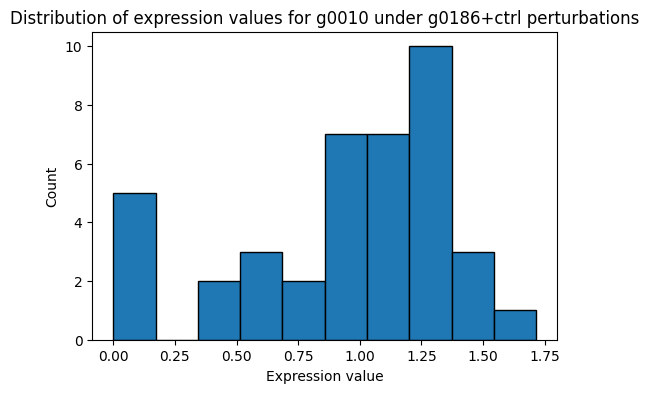

In [ ]:
# histogram of x row from ctrl_table
# x-axis expression values in bins
# y-axis count

row = "g0010"  

values = ctrl_table.loc[row].values

plt.figure(figsize=(6,4))
plt.hist(values, bins=10, edgecolor="black")
plt.xlabel("Expression value")
plt.ylabel("Count")
plt.title(f"Distribution of expression values for {row} under {a}+ctrl perturbations")
plt.show()

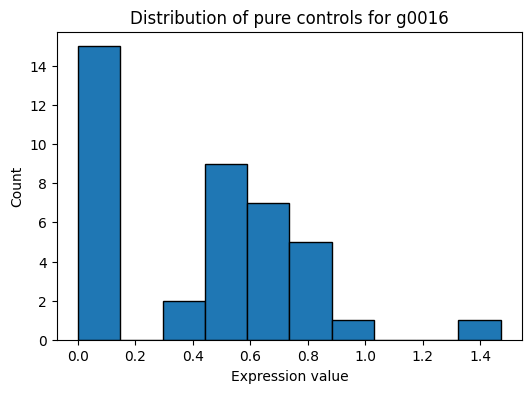

In [46]:
row = "g0016" 

values = train[pure_ctrl_cols].loc[row].values

plt.figure(figsize=(6,4))
plt.hist(values, bins=10, edgecolor="black")
plt.xlabel("Expression value")
plt.ylabel("Count")
plt.title(f"Distribution of pure controls for {row}")
plt.show()